In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

df = pd.read_csv("../data/processed/cycled_hourly_power.csv", parse_dates=['Datetime'])
df['item_id'] = 'power'

df.head()

,Datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Day_of_week,Hour_sin,Hour_cos,Day_sin,Day_cos,Holiday,item_id
0,2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,-0.965926,-2.588190e-01,-0.974928,-0.222521,0,power
1,2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,-1.000000,-1.836970e-16,-0.974928,-0.222521,0,power
2,2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,-0.965926,2.588190e-01,-0.974928,-0.222521,0,power
3,2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,-0.866025,5.000000e-01,-0.974928,-0.222521,0,power
4,2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,-0.707107,7.071068e-01,-0.974928,-0.222521,0,power


In [9]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df.head(200),
    id_column="item_id",
    timestamp_column="Datetime"
)
train_data.head()

Global_active_power  Global_reactive_power  \
item_id timestamp                                                         
power   2006-12-16 17:00:00             4.222889               0.229000   
        2006-12-16 18:00:00             3.632200               0.080033   
        2006-12-16 19:00:00             3.400233               0.085233   
        2006-12-16 20:00:00             3.268567               0.075100   
        2006-12-16 21:00:00             3.056467               0.076667   

                                Voltage  Global_intensity  Sub_metering_1  \
item_id timestamp                                                           
power   2006-12-16 17:00:00  234.643889         18.100000             0.0   
        2006-12-16 18:00:00  234.580167         15.600000             0.0   
        2006-12-16 19:00:00  233.232500         14.503333             0.0   
        2006-12-16 20:00:00  234.071500         13.916667             0.0   
        2006-12-16 21:00:00  237.158667         13.046667             0.0   

                             Sub_metering_2  Sub_metering_3  Hour  \
item_id timestamp                                                   
power   2006-12-16 17:00:00        0.527778       16.861111    17   
        2006-12-16 18:00:00        6.716667       16.866667    18   
        2006-12-16 19:00:00        1.433333       16.683333    19   
        2006-12-16 20:00:00        0.000000       16.783333    20   
        2006-12-16 21:00:00        0.416667       17.216667    21   

                             Day_of_week  Hour_sin      Hour_cos   Day_sin  \
item_id timestamp                                                            
power   2006-12-16 17:00:00            5 -0.965926 -2.588190e-01 -0.974928   
        2006-12-16 18:00:00            5 -1.000000 -1.836970e-16 -0.974928   
        2006-12-16 19:00:00            5 -0.965926  2.588190e-01 -0.974928   
        2006-12-16 20:00:00            5 -0.866025  5.000000e-01 -0.974928   
        2006-12-16 21:00:00            5 -0.707107  7.071068e-01 -0.974928   

                              Day_cos  Holiday  
item_id timestamp                               
power   2006-12-16 17:00:00 -0.222521        0  
        2006-12-16 18:00:00 -0.222521        0  
        2006-12-16 19:00:00 -0.222521        0  
        2006-12-16 20:00:00 -0.222521        0  
        2006-12-16 21:00:00 -0.222521        0

In [10]:
prediction_length = 24
train_data, test_data = train_data.train_test_split(prediction_length)

train_data.head()
test_data.head()

Global_active_power  Global_reactive_power  \
item_id timestamp                                                         
power   2006-12-16 17:00:00             4.222889               0.229000   
        2006-12-16 18:00:00             3.632200               0.080033   
        2006-12-16 19:00:00             3.400233               0.085233   
        2006-12-16 20:00:00             3.268567               0.075100   
        2006-12-16 21:00:00             3.056467               0.076667   

                                Voltage  Global_intensity  Sub_metering_1  \
item_id timestamp                                                           
power   2006-12-16 17:00:00  234.643889         18.100000             0.0   
        2006-12-16 18:00:00  234.580167         15.600000             0.0   
        2006-12-16 19:00:00  233.232500         14.503333             0.0   
        2006-12-16 20:00:00  234.071500         13.916667             0.0   
        2006-12-16 21:00:00  237.158667         13.046667             0.0   

                             Sub_metering_2  Sub_metering_3  Hour  \
item_id timestamp                                                   
power   2006-12-16 17:00:00        0.527778       16.861111    17   
        2006-12-16 18:00:00        6.716667       16.866667    18   
        2006-12-16 19:00:00        1.433333       16.683333    19   
        2006-12-16 20:00:00        0.000000       16.783333    20   
        2006-12-16 21:00:00        0.416667       17.216667    21   

                             Day_of_week  Hour_sin      Hour_cos   Day_sin  \
item_id timestamp                                                            
power   2006-12-16 17:00:00            5 -0.965926 -2.588190e-01 -0.974928   
        2006-12-16 18:00:00            5 -1.000000 -1.836970e-16 -0.974928   
        2006-12-16 19:00:00            5 -0.965926  2.588190e-01 -0.974928   
        2006-12-16 20:00:00            5 -0.866025  5.000000e-01 -0.974928   
        2006-12-16 21:00:00            5 -0.707107  7.071068e-01 -0.974928   

                              Day_cos  Holiday  
item_id timestamp                               
power   2006-12-16 17:00:00 -0.222521        0  
        2006-12-16 18:00:00 -0.222521        0  
        2006-12-16 19:00:00 -0.222521        0  
        2006-12-16 20:00:00 -0.222521        0  
        2006-12-16 21:00:00 -0.222521        0

In [11]:
predictor = TimeSeriesPredictor(
    prediction_length=24,
    target="Global_active_power",
    eval_metric="MASE",  
    path="autogluon_power_forecast",  
    known_covariates_names=[
        "Global_reactive_power", "Voltage", "Global_intensity",
        "Sub_metering_1", "Sub_metering_2", "Sub_metering_3",
        "Hour_sin", "Hour_cos", "Day_sin", "Day_cos", "Holiday"
    ]
)

predictor.fit(
    train_data,
    hyperparameters={
        "Chronos": {
            "model_path": "bolt_small",
            "fine_tune": True,
            "fine_tune_steps": 1000,
            "fine_tune_lr": 1e-5,
            "covariate_regressor": "CAT",
            "target_scaler": "standard",
            "ag_args": {"name_suffix": "FineTunedWithRegressor"}
        }
    },
    time_limit=600,
    enable_ensemble=False
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/Volumes/Tamim-Adata-512/Projects/Python/test_chronos/notebooks/autogluon_power_forecast'
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.10
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.6.0: Mon Jul 14 11:30:40 PDT 2025; root:xnu-11417.140.69~1/RELEASE_ARM64_T8132
CPU Count:          10
GPU Count:          1
Memory Avail:       5.24 GB / 16.00 GB (32.7%)
Disk Space Avail:   421.84 GB / 476.74 GB (88.5%)

Fitting with arguments:
{'enable_ensemble': False,
 'eval_metric': MASE,
 'hyperparameters': {'Chronos': {'ag_args': {'name_suffix': 'FineTunedWithRegressor'},
                                 'covariate_regressor': 'CAT',
                                 'fine_tune': True,
                                 'fine_tune_lr': 1e-05,
                                 'fine_tune_steps': 1000,
              

In [12]:
predictions = predictor.predict(
    train_data,
    known_covariates=test_data[["Global_reactive_power", "Voltage", "Global_intensity",
                               "Sub_metering_1", "Sub_metering_2", "Sub_metering_3",
                               "Hour_sin", "Hour_cos", "Day_sin", "Day_cos", "Holiday"]]
)


predictions.head(10)

Model not specified in predict, will default to the model with the best validation score: ChronosFineTunedWithRegressor[bolt_small]


mean       0.1       0.2       0.3       0.4  \
item_id timestamp                                                               
power   2006-12-24 01:00:00  3.341768  3.049356  3.137415  3.209641  3.277684   
        2006-12-24 02:00:00  2.476710  2.195610  2.273192  2.342769  2.410290   
        2006-12-24 03:00:00  2.028863  1.769093  1.844236  1.906140  1.969839   
        2006-12-24 04:00:00  1.947225  1.698125  1.767686  1.828836  1.889174   
        2006-12-24 05:00:00  2.067895  1.837370  1.900753  1.955709  2.011931   
        2006-12-24 06:00:00  2.103796  1.888723  1.944055  1.995919  2.050150   
        2006-12-24 07:00:00  1.863187  1.675993  1.724606  1.768122  1.814015   
        2006-12-24 08:00:00  1.592310  1.436524  1.478399  1.514836  1.553884   
        2006-12-24 09:00:00  2.846649  2.698451  2.738597  2.771369  2.806401   
        2006-12-24 10:00:00  3.074529  2.922311  2.965188  3.001007  3.035465   

                                  0.5       0.6       0.7       0.8       0.9  
item_id timestamp                                                              
power   2006-12-24 01:00:00  3.341768  3.423344  3.544487  3.757291  4.243037  
        2006-12-24 02:00:00  2.476710  2.556265  2.673864  2.891887  3.412879  
        2006-12-24 03:00:00  2.028863  2.102718  2.214572  2.443496  2.984212  
        2006-12-24 04:00:00  1.947225  2.012110  2.118377  2.342829  2.891485  
        2006-12-24 05:00:00  2.067895  2.133922  2.238997  2.459895  3.021048  
        2006-12-24 06:00:00  2.103796  2.170258  2.271183  2.483056  3.046547  
        2006-12-24 07:00:00  1.863187  1.923254  2.020356  2.226245  2.794996  
        2006-12-24 08:00:00  1.592310  1.650144  1.741356  1.942526  2.518097  
        2006-12-24 09:00:00  2.846649  2.899377  2.992598  3.193433  3.780767  
        2006-12-24 10:00:00  3.074529  3.124731  3.214175  3.414869  4.012100

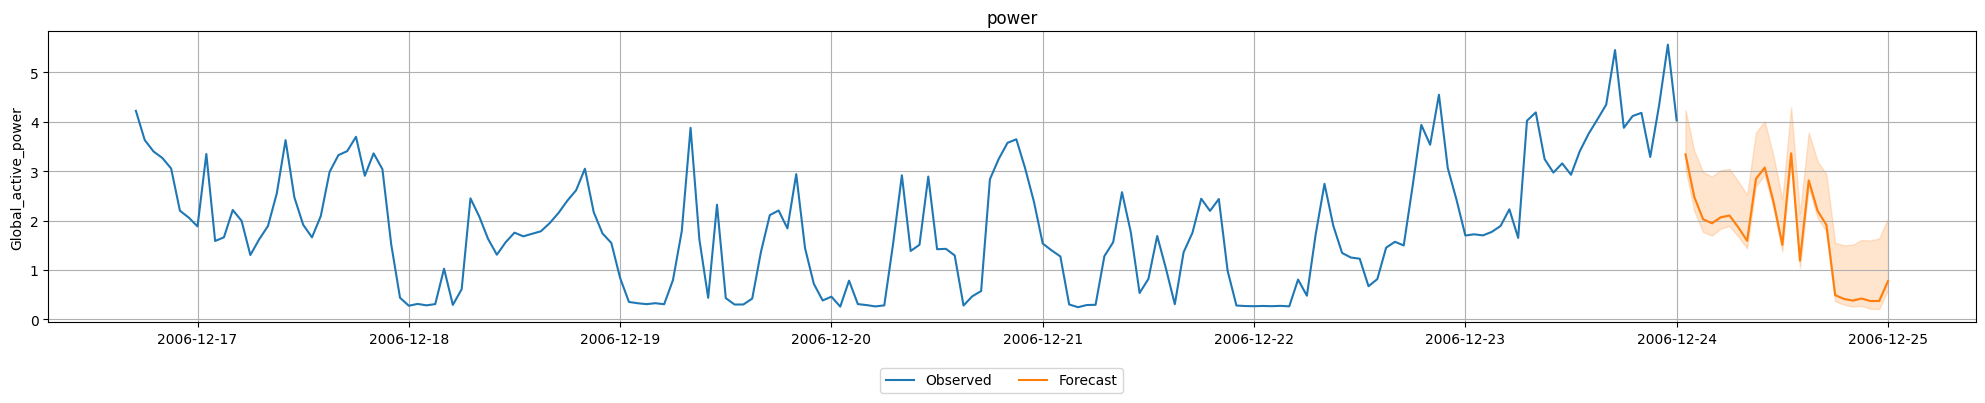

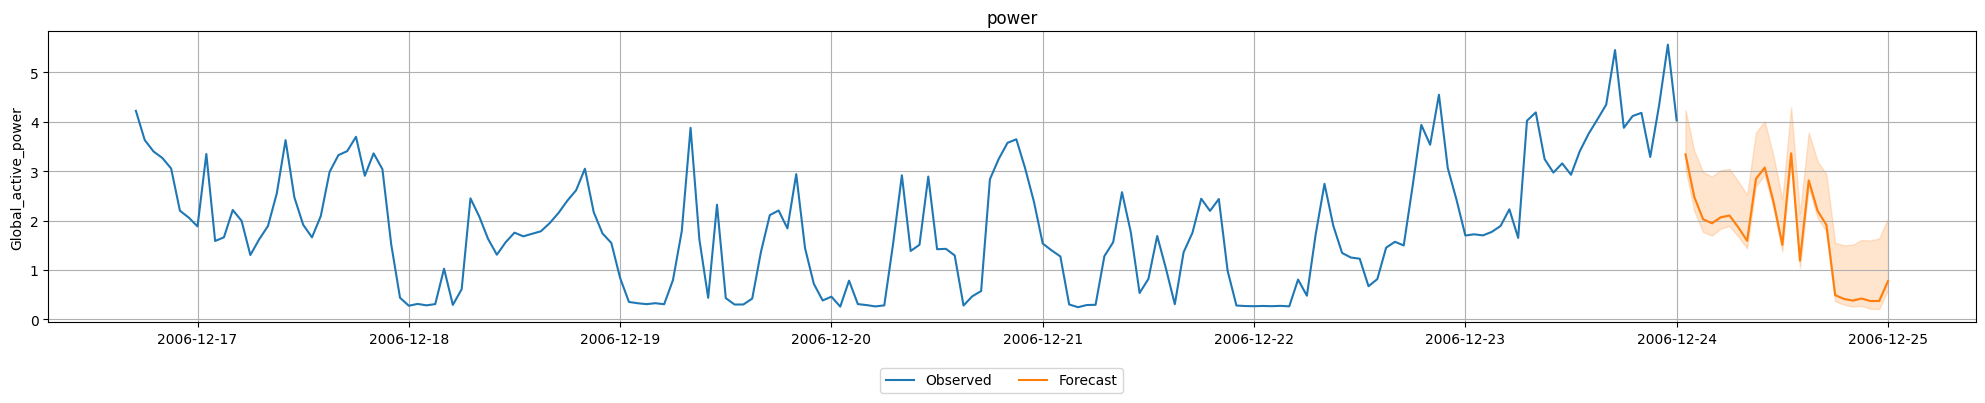

In [13]:
predictor.plot(
    data=train_data,
    predictions=predictions,
    item_ids=["power"],
    max_history_length=200,
)

In [14]:
leaderboard = predictor.leaderboard(test_data)
leaderboard

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosFineTunedWithRegressor[bolt_small],-0.194764,-0.796404,1.197872,0.068836,489.707007,1
